In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [132]:
df = pd.read_csv('housing.csv')

In [133]:
len(df)

20640

In [134]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### The distribution of 'median_house_value' doesn't have a long tail

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

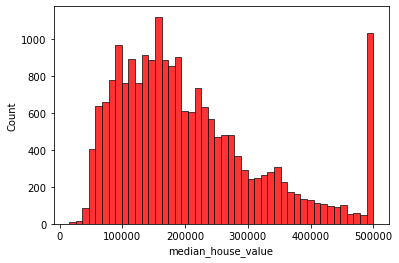

In [135]:
sns.histplot(df.median_house_value,color='red',alpha=0.8)

In [136]:
columns=['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [137]:
df1=df[columns]

### 1)The feature with missings values is total_bedrooms which contains 207 missing values

In [147]:
df1.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### 2) The percentil 50% of population is 1166

In [139]:
df1['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [140]:
n=len(df1)

In [141]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [142]:
n_train,n_val,n_test

(12384, 4128, 4128)

In [144]:
df1

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [143]:
df1.loc[:n_train]

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
12380,33.77,-116.47,26.0,4300.0,767.0,1557.0,669.0,4.4107,122500.0
12381,33.78,-116.47,27.0,1781.0,441.0,759.0,340.0,3.3162,113600.0
12382,33.73,-116.38,10.0,11836.0,2405.0,3811.0,1570.0,4.0079,134500.0
12383,33.72,-116.37,17.0,8626.0,1859.0,3497.0,1337.0,3.3120,121300.0


In [127]:
df1.loc[n_train:n_train+n_val]

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12384,33.72,-116.39,19.0,7646.0,1618.0,2496.0,1075.0,3.5569,128000.0
12385,33.71,-116.38,17.0,12509.0,2460.0,2737.0,1423.0,4.5556,258100.0
12386,33.69,-116.39,10.0,11659.0,2007.0,2186.0,1083.0,6.9833,238800.0
12387,33.72,-116.37,19.0,6190.0,1355.0,2242.0,1043.0,3.0021,152300.0
12388,33.77,-116.44,18.0,4872.0,1110.0,955.0,656.0,2.2439,97500.0
...,...,...,...,...,...,...,...,...,...
16508,37.80,-121.10,35.0,1853.0,331.0,958.0,340.0,3.3578,149000.0
16509,37.76,-121.11,22.0,2606.0,411.0,1252.0,397.0,4.1833,192100.0
16510,37.73,-121.16,7.0,4956.0,941.0,3006.0,915.0,3.4426,139000.0
16511,37.76,-121.25,22.0,2430.0,417.0,1292.0,391.0,3.4009,182400.0


In [128]:
df1.loc[n_train+n_val:]

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16512,37.72,-121.22,34.0,2123.0,387.0,1310.0,368.0,2.6368,165600.0
16513,37.81,-121.22,17.0,2879.0,542.0,1802.0,530.0,3.6378,126100.0
16514,37.80,-121.22,28.0,2608.0,576.0,1719.0,554.0,2.1186,94400.0
16515,37.80,-121.22,37.0,1038.0,222.0,521.0,211.0,2.1250,91900.0
16516,37.81,-121.21,18.0,2404.0,498.0,1531.0,506.0,2.9950,124300.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [129]:
idx=np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [148]:
np.random.seed(42)
np.random.shuffle(idx)

In [149]:
df1.loc[idx[:10]]

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9337,37.97,-122.59,46.0,4036.0,856.0,1872.0,833.0,4.5625,275200.0
20253,34.23,-119.19,17.0,3889.0,748.0,2415.0,739.0,4.5000,234300.0
12117,33.95,-117.21,5.0,8403.0,1240.0,3962.0,1150.0,5.2174,155500.0
3304,38.96,-122.63,20.0,2507.0,577.0,1072.0,457.0,2.3083,60200.0
13685,34.15,-117.24,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0
7645,33.81,-118.27,10.0,1881.0,571.0,1769.0,553.0,3.9286,114000.0
9075,34.70,-118.16,33.0,2918.0,494.0,1365.0,478.0,4.8787,127700.0
2527,39.53,-122.20,22.0,3265.0,658.0,1647.0,594.0,2.3566,71000.0
3750,34.18,-118.38,27.0,4834.0,1527.0,3847.0,1432.0,2.1449,165300.0
17751,37.33,-121.84,26.0,1934.0,408.0,2059.0,416.0,3.6765,163600.0


In [150]:
df_train=df1.loc[idx[:n_train]]
df_val=df1.loc[idx[n_train:n_train+n_val]]
df_test=df1.loc[idx[n_train+n_val:]]

In [151]:
len(df_train),len(df_val),len(df_test)

(12384, 4128, 4128)

In [154]:
df_test

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
68,37.81,-122.30,52.0,572.0,109.0,274.0,82.0,1.8516,85000.0
8606,33.87,-118.36,22.0,2114.0,541.0,1300.0,538.0,3.4208,290000.0
1121,39.79,-121.58,19.0,2636.0,523.0,1184.0,465.0,2.7863,108600.0
11913,33.96,-117.43,28.0,3747.0,651.0,2399.0,646.0,3.8682,116500.0
17699,37.28,-121.82,31.0,1340.0,235.0,1336.0,270.0,4.2361,179500.0
...,...,...,...,...,...,...,...,...,...
2463,36.54,-119.87,34.0,1370.0,287.0,818.0,269.0,2.4044,72500.0
6895,34.04,-118.11,28.0,3913.0,696.0,2264.0,697.0,5.2446,258000.0
12725,38.61,-121.35,27.0,3900.0,776.0,1549.0,761.0,2.7788,115700.0
18498,37.02,-121.51,19.0,2372.0,394.0,1142.0,365.0,4.0238,374600.0


In [189]:
y_train=np.log1p(df_train.median_house_value.values)
y_val=np.log1p(df_val.median_house_value.values)
y_test=np.log1p(df_test.median_house_value.values)

In [191]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [246]:
X_train=df_train.fillna(0).values

In [247]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X =  np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [260]:
w0, w = train_linear_regression(X_train,y_train)
X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)

<AxesSubplot:ylabel='Count'>

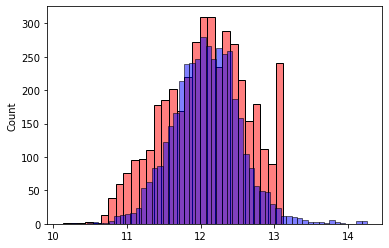

In [261]:
sns.histplot(y_val,color='red',alpha=0.5)
sns.histplot(y_pred,color='blue',alpha=0.5)

In [262]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

### RSE replacing with 0 is 0.34

In [259]:
rmse(y_val, y_pred).round(2)

0.34

In [232]:
df_train['total_bedrooms'].mean()  # Mean = 539

539.1797422932638

### RSE replacing with the mean of 'total_bedrooms' is 0.34

In [273]:
X_train=df_train.fillna(539).values

In [274]:
w0, w = train_linear_regression(X_train,y_train)
X_val = df_val.fillna(539).values
y_pred = w0 + X_val.dot(w)

<AxesSubplot:ylabel='Count'>

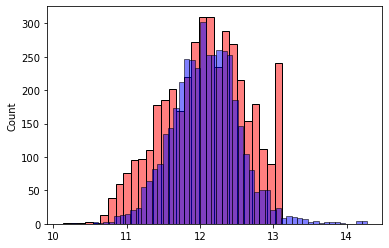

In [275]:
sns.histplot(y_val,color='red',alpha=0.5)
sns.histplot(y_pred,color='blue',alpha=0.5)

In [276]:
rmse(y_val, y_pred).round(2)

0.34

### 3) Both are equally good

In [277]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9337,37.97,-122.59,46.0,4036.0,856.0,1872.0,833.0,4.5625
20253,34.23,-119.19,17.0,3889.0,748.0,2415.0,739.0,4.5000
12117,33.95,-117.21,5.0,8403.0,1240.0,3962.0,1150.0,5.2174
3304,38.96,-122.63,20.0,2507.0,577.0,1072.0,457.0,2.3083
13685,34.15,-117.24,26.0,2041.0,293.0,936.0,375.0,6.0000
...,...,...,...,...,...,...,...,...
3244,36.10,-119.57,36.0,1729.0,317.0,737.0,278.0,3.5313
5021,33.99,-118.33,44.0,1918.0,387.0,1041.0,364.0,2.8542
10866,33.70,-117.88,18.0,2135.0,373.0,1464.0,405.0,5.4836
15974,37.72,-122.40,47.0,1167.0,250.0,953.0,253.0,4.2727


### 4) The r with best performance is 0.01

In [280]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [281]:
X_train=df_train.fillna(0).values

In [289]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score.round(7))

0 -11.65634459015098 0.3428318
1e-06 -11.65632870116974 0.3428318
0.0001 -11.654755895945806 0.3428315
0.001 -11.640477104071742 0.3428287
0.01 -11.499589723212367 0.3428039
0.1 -10.257998427515025 0.3427422
1 -4.931613572889126 0.3456731
5 -1.4891848575130042 0.350273
10 -0.7941313737211786 0.3514515
